This Notebook will 'simply' learn to calculate a given number representing the degrees in Celcius to its Fahrenheit equivalent. 

In [3]:
#First we import numpy, tensorflow and finally matplotlib to visualise our training's loss
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Let the data's inputs consist of random numbers between -50 and 101
c_inputs = np.random.uniform(low=-50, high=101, size=(50,))
f_outputs = []

#We calculate the Fahrenheit equivalent for the expected output
for i in c_inputs:
  temp = (i * 1.8) + 32
  f_outputs.append(temp)

print(c_inputs)
print(f_outputs)

[ -5.9530066   -6.84767595  77.85575856 -31.61543946  29.00996718
  23.88244805   3.05958715  49.87548145  -1.02463148 -16.04230098
  72.64300039  28.97774844  66.4947559   73.44081643  37.21353736
   2.70817318  37.51101448  69.28201426  66.64971516 -47.84510629
 -42.93452416 -36.24321919 -27.51012259  37.0473505  -36.55295227
  37.9948972   76.8692719  -32.71356604  50.61297513 -20.06371798
  10.98560753 -43.69471744  -4.12156542  10.46438823  58.0677792
  80.62942314  40.06402912 -22.56298761  21.40085487  45.52771607
 -48.53062623  39.01611422 -26.53988748  52.9709079   72.45876904
  89.26379942  34.24370935  48.56167725   0.99687349 -19.01813775]
[21.284588116182917, 19.67418328832511, 172.14036541312691, -24.90779102897863, 84.21794092857074, 74.98840648890504, 37.507256876243375, 121.77586660224118, 30.15566332870449, 3.123858231648587, 162.75740070011176, 84.15994718469523, 151.6905606126985, 164.19346958222192, 98.98436723998026, 36.87471171595026, 99.51982607078561, 156.70762

I am pretty happy with how those numbers look. For example I get 51.96240032 (C) as 125.53232058104756 (F) which is correct.

In [4]:
#We convert our datasets now to np.arrays for optimum usage. They are much more memory efficient, they don't call other Python objects
#The added bonus is that we get access to matrix and vector functions built-in
c_inputs_np = np.array(c_inputs, dtype=float)
f_outputs_np = np.array(f_outputs, dtype=float)

#We're using a simple 1 layered Sequential model because we have a simple 1 input and 1 output dataset
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential(layer)

#The loss function is important as it will indicate how well our model above is performing. We want a low Mean Squared Error.
#Adam is a way for the model to optimize itself during training where it looks to see how close its guess is to what is expected.
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
#Fit does the actual training and does it for the number of epochs (sounds epic, just means iterations)
history = model.fit(c_inputs_np, f_outputs_np, epochs=500, verbose=False)
print("Finished training")

Finished training


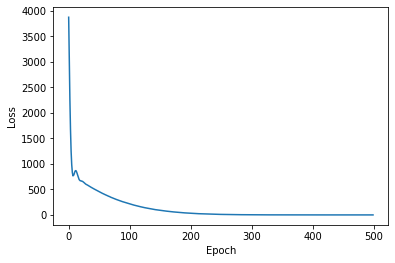

In [5]:
#Let's have a look at how we did on our training
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

Pretty good we're getting very close to 0 in our loss.

In [6]:
#Let's do a prediction on our model. One of my favourites is -40 because it's the same in Celsius and Fahrenheit
print(model.predict([-40.0]))

[[-40.070496]]


I am very happy with that. 

In [8]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.8005121]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([31.94999], dtype=float32)>]
